In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 

In [3]:
data = pd.read_csv("ks-projects-201801.csv")

# 使わない列を削除
data = data.drop(['pledged','usd pledged','usd_pledged_real','usd_goal_real','backers'],axis=1)
# launchの異常値含む列を削除
data = data.drop([319002,2842,48147,94579,75397,247913,273779],axis=0)

In [4]:
data.head(20)

,ID,name,category,main_category,currency,deadline,goal,launched,state,country
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,failed,US
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,canceled,US
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,US
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,successful,US
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,failed,US
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,canceled,US
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,canceled,US


In [5]:
data.isnull().sum()

ID               0
name             4
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
dtype: int64

In [6]:
# 欠損値処理
data["name"] = data["name"].fillna("nan")
data.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
dtype: int64

In [7]:
# 日付のformat変更
data["deadline"] = pd.to_datetime(data["deadline"],format="%Y-%m-%d")
data["launched"] = pd.to_datetime(data["launched"],format="%Y-%m-%d %H:%M")

In [8]:
data["period"] = data["deadline"] - data["launched"]
data["period_days"] = data["period"].dt.days

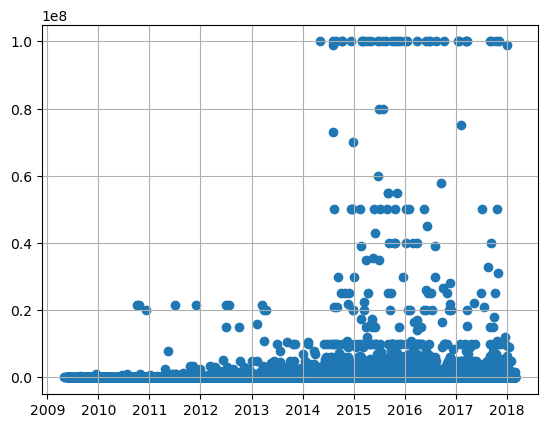

In [9]:
plt.scatter(data["deadline"],data["goal"])
plt.grid()

In [10]:
data["state"].value_counts()

failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [11]:
# stateのfailedを0に、そのほかを1に
data["state"] = [1 if s == "successful" else 0 for s in data["state"]]
data

,ID,name,category,main_category,currency,deadline,goal,launched,state,country,period,period_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,29 days 20:35:49,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,0,US,55 days 15:24:57,55
...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,0,US,29 days 21:24:30,29
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,0,US,26 days 20:24:46,26
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,0,US,45 days 04:19:30,45
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,0,US,30 days 05:46:07,30


In [12]:
data["state"].value_counts()

0    244698
1    133956
Name: state, dtype: int64

In [13]:
data_success = data[data["state"] == 1]
data_fail = data[data["state"] == 0]

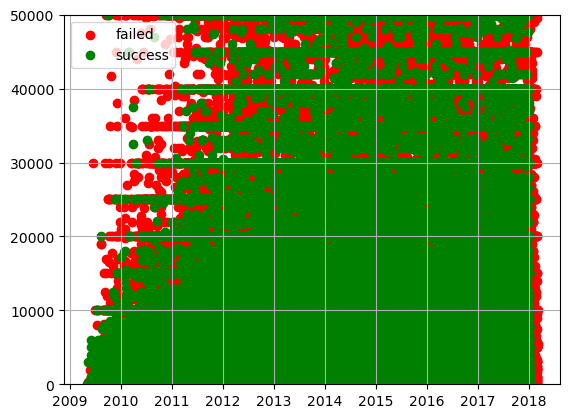

In [14]:
plt.scatter(data_fail["deadline"],data_fail["goal"],label="failed", c = "r")
plt.scatter(data_success["deadline"],data_success["goal"],label="success",c = "green")
plt.legend()
plt.ylim([0,50000])
plt.grid()

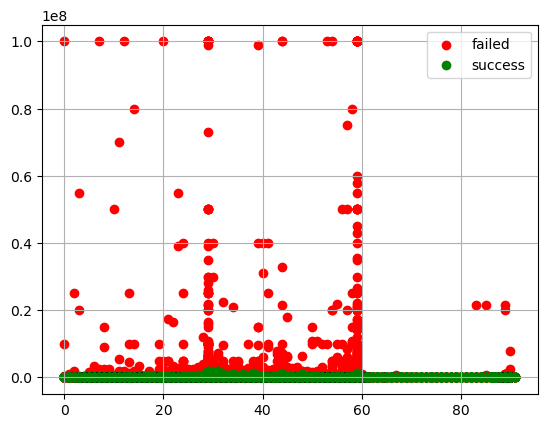

In [15]:
plt.scatter(data_fail["period_days"],data_fail["goal"],label="failed", c = "r")
plt.scatter(data_success["period_days"],data_success["goal"],label="success",c = "green")
plt.legend()
plt.grid()

In [22]:
X = data[["main_category","currency","goal","country","period_days"]]
X = pd.get_dummies(X)
y = data["state"]

In [25]:
##### 以降は自分で実装しましょう #####
clf = SGDClassifier(loss='log_loss', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
clf.fit(X, y)

SGDClassifier(loss='log_loss', max_iter=10000, penalty='none',
              random_state=1234)

In [30]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[1]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[1]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[1]))

正答率（Accuracy） = 49.573%
適合率（Precision） = 40.058%
再現率（Recall） = 85.701%
F1値（F1-score） = 54.596%
